<a href="https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/optimizing_learning_rate_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring different learning rates in gradient descent

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gradient Descent

In [0]:
class GradientDescent():
    """
    A simple class for playing around with gradient descent 
    for univariate function.
    """
    
    def __init__(self, f, f_prime, lr, x_init, a_init, b_init):
        """
        f       the function for which we want to find a minimum
        fprime  its derivative
        lr      learning rate
        x_init  starting point
        a_init and b_init define the interval in which the functions is shown 
        """
        self.f = f
        self.f_prime = f_prime
        # this is a list of all points visited by gradient descent
        self.xs = [x_init]
        self.a = a_init
        self.b = b_init
        self.lr = lr
        
    def step(self, num_steps=1):
        """
        perform num_step steps of gradient descent
        note that the window gets adjusted automatically
        """
        for _ in range(num_steps):
            x = self.xs[-1]
            
            # one step of gradient descent
            x = x - self.lr * self.f_prime(x)
            
            # update
            self.xs.append(x)
            self.a = min(self.xs[-1], self.a)
            self.b = max(self.xs[-1], self.b)
            
    def plot(self):
        """
        plot the function and the points visited so far
        """
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax.grid(True)
        
        # plot function
        x_axis = np.linspace(self.a, self.b)
        ax.plot(x_axis, [self.f(x) for x in x_axis])
        
        # plot all points encountered during gradient descent
        ax.scatter(self.xs, [self.f(x) for x in self.xs])

## What can go wrong with gradient descent?

### Divergence

In [0]:
def f(x):
    return 2.0 * (x - 2.0)**2

def f_prime(x):
    return 4.0 * (x - 2.0)

In [0]:
GD = GradientDescent(f, f_prime, lr=1.0, x_init=0.0, a_init=0.0, b_init=4.0)

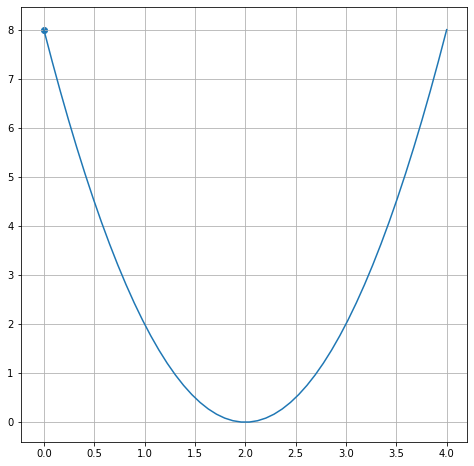

In [0]:
GD.plot()

In [0]:
GD.step(4)

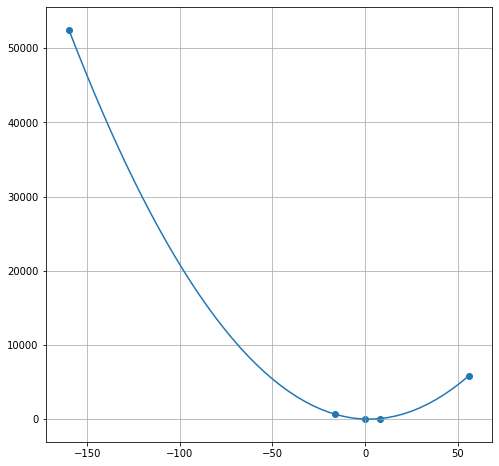

In [0]:
GD.plot()

### Getting stuck in a local minimum

In [0]:
def g(x):
  return x ** 4 + 2 * (x - 0.1) ** 3 - x

def g_prime(x):
  return 4 * x ** 3 + 6 ** (x - 0.1) ** 2 - 1

In [0]:
GD = GradientDescent(g, g_prime, lr=0.05, x_init=1.0, a_init=-2.0, b_init=1.0)

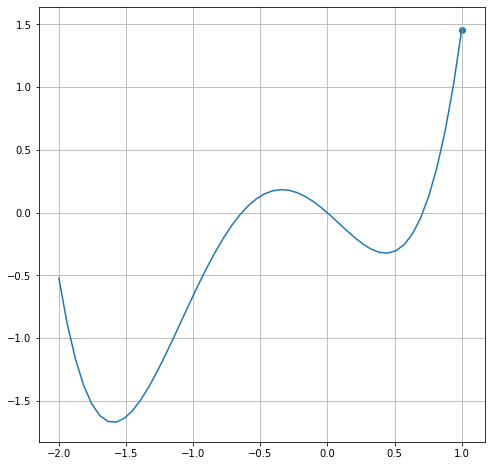

In [0]:
GD.plot()

In [0]:
GD.step(10)

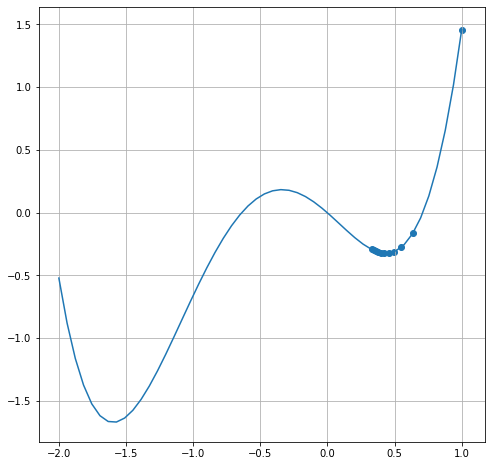

In [0]:
GD.plot()